In [68]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
df=pd.read_csv("day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.shape

(730, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
df.isnull().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

## EDA

In [9]:
# Drop unnecessary column

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [10]:
df.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
df.shape

(730, 12)

In [12]:
# Change all ctegorical data 

df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'clear',2:'mist',3:'light_rain',4:'heavy_rain'},inplace = True)

df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'},inplace = True)

df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'},inplace = True)

In [13]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
num_cols = ['temp','atemp','hum','windspeed','cnt']

<Axes: >

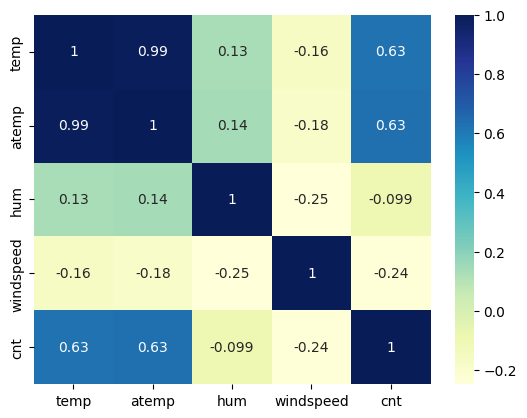

In [15]:
# Plot Heatmap

sns.heatmap(df[num_cols].corr(),cmap="YlGnBu",annot=True)

<Figure size 1500x3000 with 0 Axes>

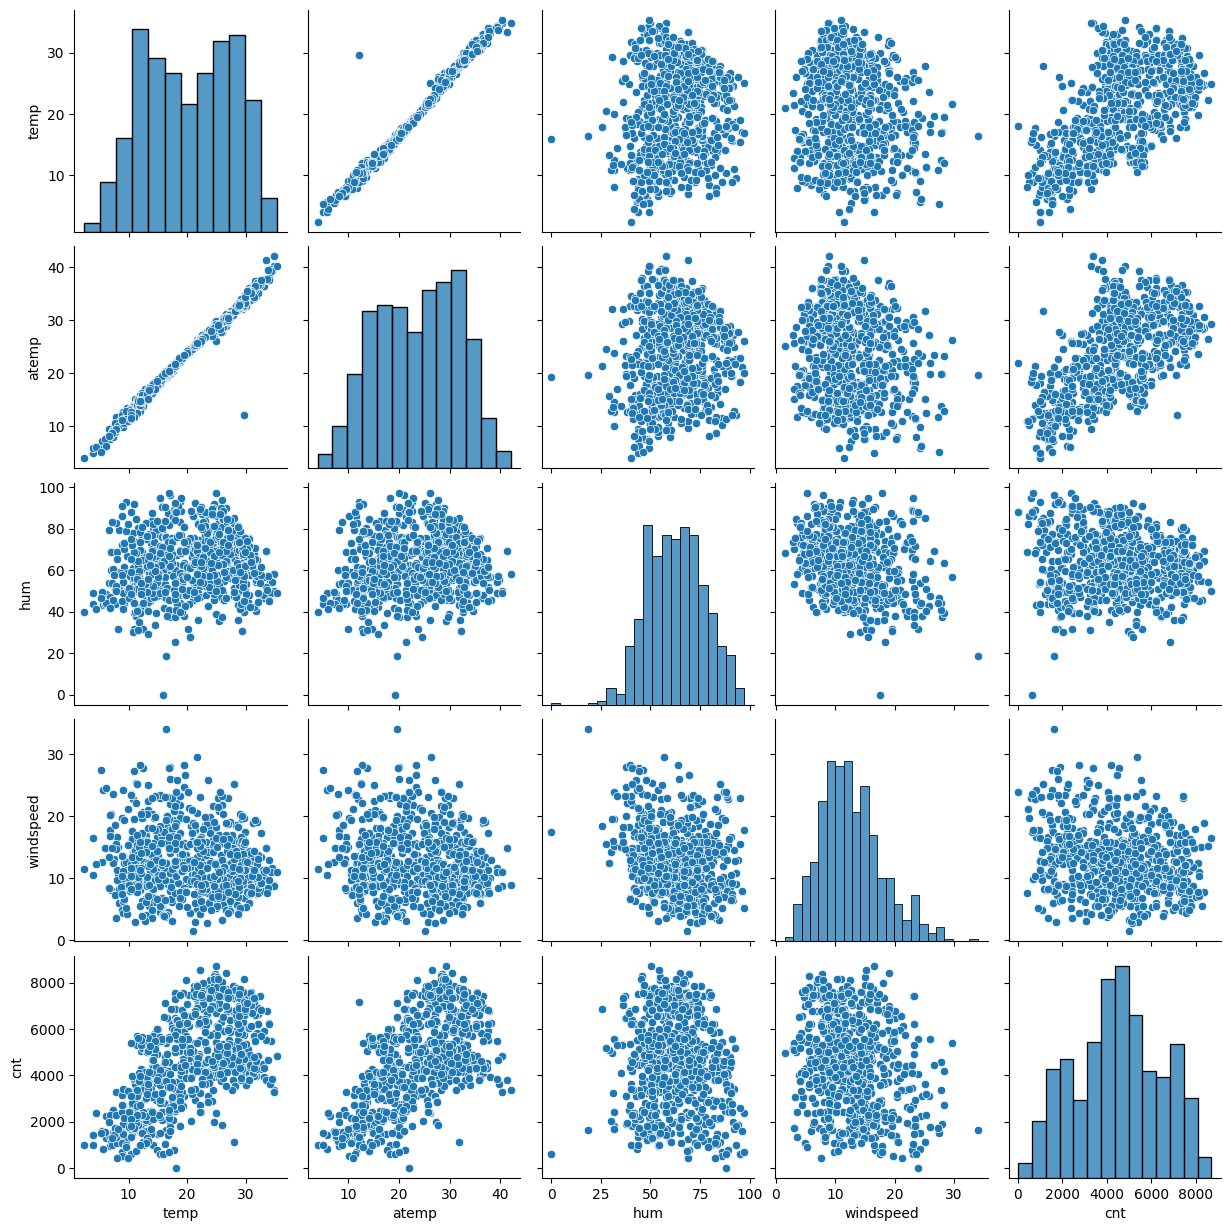

In [16]:
plt.figure(figsize = (15,30))
sns.pairplot(data=df,vars=num_cols)
plt.show()

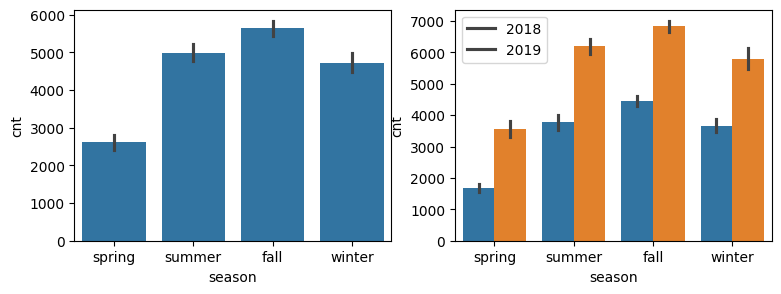

In [17]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='season',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='season',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

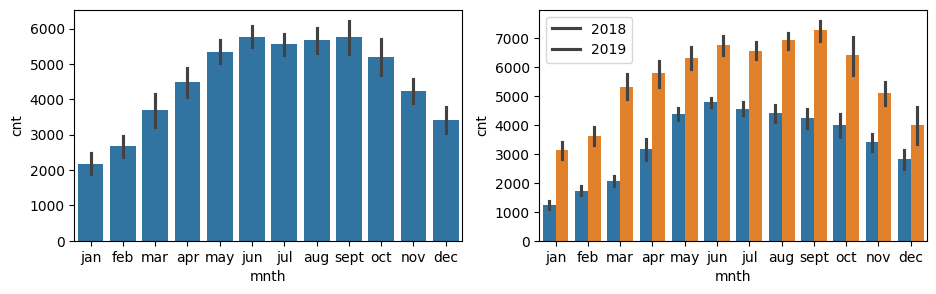

In [77]:
plt.figure(figsize = (11,3))
plt.subplot(1,2,1)
sns.barplot(x='mnth',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='mnth',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

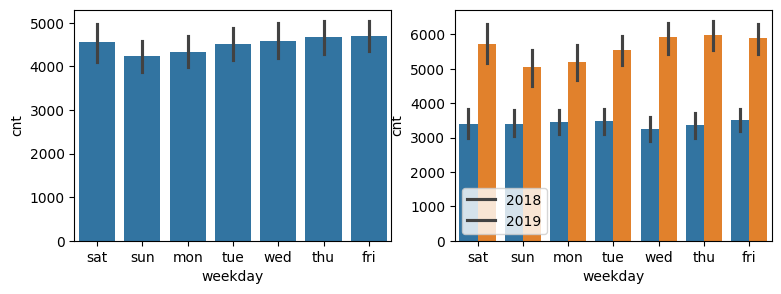

In [19]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='weekday',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='weekday',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

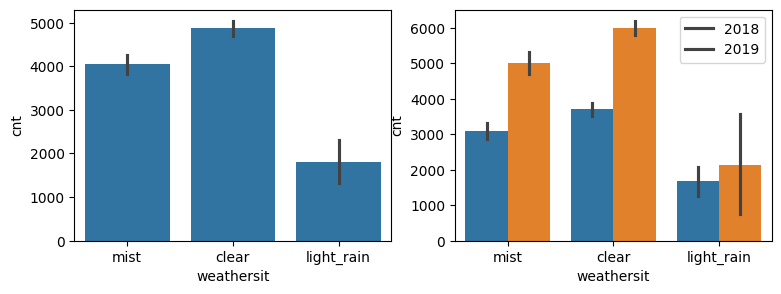

In [20]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='weathersit',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='weathersit',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

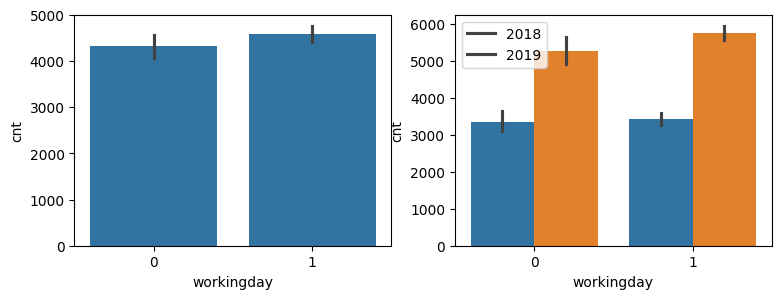

In [76]:
plt.figure(figsize = (9,3))
plt.subplot(1,2,1)
sns.barplot(x='workingday',y='cnt',data=df)
plt.subplot(1,2,2)
sns.barplot(x='workingday',y='cnt',data=df, hue='yr')
plt.legend(labels=['2018', '2019'])
plt.show()

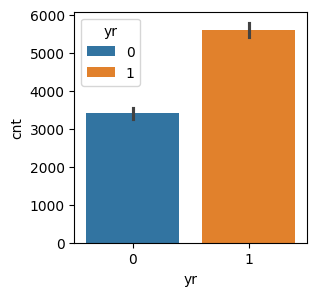

In [75]:
plt.figure(figsize = (3,3))
sns.barplot(x='yr',y='cnt',data=df, hue='yr')
plt.show()

## Creating Dummy Variables 

In [21]:
df1=pd.get_dummies(df,columns=["season","mnth","weekday","weathersit"],drop_first=True,dtype=int)

In [22]:
df1.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
df1.shape

(730, 30)

## Splitting data into Train - Test


In [24]:
X=df1.drop(['cnt'],axis=1)
y=df1['cnt']

In [25]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_light_rain', 'weathersit_mist'],
      dtype='object')

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [27]:
print(X_train.shape)
print(X_test.shape)

(511, 29)
(219, 29)


## Scaling

In [28]:
scaler = MinMaxScaler()

In [29]:
num_cols = ['temp','atemp','hum','windspeed']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [30]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_light_rain,weathersit_mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## RFE 

In [31]:
lr = LinearRegression()
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 12),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 13),
 ('weathersit_light_rain', True, 1),
 ('weathersit_mist', True, 1)]

In [33]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_jul',
       'mnth_sept', 'weekday_sat', 'weekday_sun', 'weathersit_light_rain',
       'weathersit_mist'],
      dtype='object')

In [34]:
selected_features=X_train.columns[rfe.support_]

In [35]:
X_train= X_train[selected_features]
X_test= X_test[selected_features]

In [36]:
print(X_train.shape)
print(X_test.shape)

(511, 15)
(219, 15)


## Create Model

In [37]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

In [38]:
lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

In [39]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          7.31e-192
Time:                        01:49:18   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1749.2759    241.136      7.254      0.000    1275.503    2223.049
yr                     2001.0234     69.739     28.693      0.000    1864.003    2138.044
holiday                -158.5623    185.105     -0.857      0.392    -522.249     205.125
workingday              734.1413     84.008      8.739      0.000     569.085     899.197
temp                   4594.3484    289.038     15.895      0.000    4026.459    5162.238
hum                   -1407.9319    324.982     -4.332      0.000   -2046.442    -769.421
windspeed             -1572.5713    221.125     -7.112      0.000   -2007.028   -1138.115
season_spring          -479.6179    179.117     -2.678      0.008    -831.539    -127.697
season_summer           467.9987    128.767      3.634      0.000     215.004     720.994
season_winter           874.3677    148.241      5.898      0.000     583.111    1165.625
mnth_jul               -476.4896    157.411     -3.027      0.003    -785.764    -167.216
mnth_sept               710.9998    143.639      4.950      0.000     428.784     993.216
weekday_sat             817.6135    101.374      8.065      0.000     618.439    1016.788
weekday_sun             356.0835    106.665      3.338      0.001     146.512     565.655
weathersit_light_rain -2133.3401    226.903     -9.402      0.000   -2579.150   -1687.530
weathersit_mist        -492.3423     90.355     -5.449      0.000    -669.868    -314.816
==============================================================================
Omnibus:                       64.763   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.557
Skew:                          -0.662   Prob(JB):                     1.01e-34
Kurtosis:                       5.367   Cond. No.                     1.06e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.34e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [40]:
# VIF 

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,50.829354
11,weekday_sat,12.198278
12,weekday_sun,11.785912
6,season_spring,5.021533
3,temp,3.615446
8,season_winter,3.495427
1,holiday,2.907622
7,season_summer,2.623422
4,hum,1.906795
14,weathersit_mist,1.569983


In [41]:
X_train=X_train.drop("workingday",axis=1)
X_test=X_test.drop("workingday",axis=1)

In [42]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.2
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          7.31e-192
Time:                        01:49:18   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8264.
Df Residuals:                     496   BIC:                             8327.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  2483.4172    296.888      8.365      0.000    1900.103    3066.731
yr                     2001.0234     69.739     28.693      0.000    1864.003    2138.044
holiday                -892.7036    220.817     -4.043      0.000   -1326.556    -458.852
temp                   4594.3484    289.038     15.895      0.000    4026.459    5162.238
hum                   -1407.9319    324.982     -4.332      0.000   -2046.442    -769.421
windspeed             -1572.5713    221.125     -7.112      0.000   -2007.028   -1138.115
season_spring          -479.6179    179.117     -2.678      0.008    -831.539    -127.697
season_summer           467.9987    128.767      3.634      0.000     215.004     720.994
season_winter           874.3677    148.241      5.898      0.000     583.111    1165.625
mnth_jul               -476.4896    157.411     -3.027      0.003    -785.764    -167.216
mnth_sept               710.9998    143.639      4.950      0.000     428.784     993.216
weekday_sat              83.4723     96.990      0.861      0.390    -107.090     274.034
weekday_sun            -378.0578    100.493     -3.762      0.000    -575.503    -180.612
weathersit_light_rain -2133.3401    226.903     -9.402      0.000   -2579.150   -1687.530
weathersit_mist        -492.3423     90.355     -5.449      0.000    -669.868    -314.816
==============================================================================
Omnibus:                       64.763   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              156.557
Skew:                          -0.662   Prob(JB):                     1.01e-34
Kurtosis:                       5.367   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.278452
2,temp,16.080472
4,windspeed,4.687237
5,season_spring,4.031621
7,season_winter,3.368131
6,season_summer,2.792839
13,weathersit_mist,2.301482
0,yr,2.082492
8,mnth_jul,1.588022
9,mnth_sept,1.385693


In [44]:
X_train=X_train.drop("hum",axis=1)
X_test=X_test.drop("hum",axis=1)

In [45]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          4.84e-189
Time:                        01:49:18   Log-Likelihood:                -4126.3
No. Observations:                 511   AIC:                             8281.
Df Residuals:                     497   BIC:                             8340.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1788.2247    254.213      7.034      0.000    1288.760    2287.689
yr                     2035.8715     70.501     28.877      0.000    1897.355    2174.389
holiday                -899.4471    224.724     -4.002      0.000   -1340.974    -457.921
temp                   4278.4302    284.644     15.031      0.000    3719.176    4837.684
windspeed             -1294.4957    215.353     -6.011      0.000   -1717.611    -871.380
season_spring          -566.5254    181.144     -3.127      0.002    -922.428    -210.623
season_summer           415.0994    130.458      3.182      0.002     158.783     671.416
season_winter           747.0853    147.875      5.052      0.000     456.549    1037.622
mnth_jul               -433.0036    159.874     -2.708      0.007    -747.116    -118.892
mnth_sept               658.0388    145.654      4.518      0.000     371.865     944.212
weekday_sat              98.6827     98.644      1.000      0.318     -95.128     292.493
weekday_sun            -405.2426    102.075     -3.970      0.000    -605.794    -204.692
weathersit_light_rain -2522.6079    212.047    -11.896      0.000   -2939.227   -2105.989
weathersit_mist        -718.1845     75.109     -9.562      0.000    -865.754    -570.615
==============================================================================
Omnibus:                       66.789   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.981
Skew:                          -0.681   Prob(JB):                     6.70e-36
Kurtosis:                       5.399   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.188400
3,windspeed,4.632090
5,season_summer,2.239882
4,season_spring,2.131645
0,yr,2.073019
6,season_winter,1.840955
7,mnth_jul,1.588022
12,weathersit_mist,1.553387
8,mnth_sept,1.337288
9,weekday_sat,1.229449


In [47]:
X_train=X_train.drop("weekday_sat",axis=1)
X_test=X_test.drop("weekday_sat",axis=1)

In [48]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          5.26e-190
Time:                        01:49:19   Log-Likelihood:                -4126.8
No. Observations:                 511   AIC:                             8280.
Df Residuals:                     498   BIC:                             8335.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1808.0698    253.438      7.134      0.000    1310.130    2306.009
yr                     2033.6565     70.466     28.860      0.000    1895.208    2172.105
holiday                -919.0344    223.870     -4.105      0.000   -1358.880    -479.189
temp                   4271.2277    284.553     15.010      0.000    3712.155    4830.300
windspeed             -1284.3406    215.114     -5.971      0.000   -1706.984    -861.697
season_spring          -566.7050    181.144     -3.128      0.002    -922.606    -210.805
season_summer           413.9050    130.452      3.173      0.002     157.600     670.210
season_winter           748.7342    147.866      5.064      0.000     458.217    1039.252
mnth_jul               -429.6406    159.839     -2.688      0.007    -743.682    -115.599
mnth_sept               658.7278    145.652      4.523      0.000     372.559     944.897
weekday_sun            -423.8620    100.363     -4.223      0.000    -621.050    -226.674
weathersit_light_rain -2522.3338    212.047    -11.895      0.000   -2938.951   -2105.717
weathersit_mist        -718.4256     75.108     -9.565      0.000    -865.994    -570.857
==============================================================================
Omnibus:                       63.136   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.214
Skew:                          -0.634   Prob(JB):                     4.41e-35
Kurtosis:                       5.413   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.145895
3,windspeed,4.608142
5,season_summer,2.235110
4,season_spring,2.105422
0,yr,2.071489
6,season_winter,1.818299
7,mnth_jul,1.586681
11,weathersit_mist,1.553234
8,mnth_sept,1.336655
9,weekday_sun,1.179727


In [50]:
X_train=X_train.drop("mnth_jul",axis=1)
X_test=X_test.drop("mnth_jul",axis=1)

In [51]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.8
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          1.19e-189
Time:                        01:49:19   Log-Likelihood:                -4130.5
No. Observations:                 511   AIC:                             8285.
Df Residuals:                     499   BIC:                             8336.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1738.6452    253.686      6.854      0.000    1240.220    2237.070
yr                     2038.3221     70.883     28.756      0.000    1899.056    2177.588
holiday                -911.2244    225.243     -4.046      0.000   -1353.766    -468.683
temp                   4162.0231    283.389     14.687      0.000    3605.240    4718.806
windspeed             -1285.7932    216.451     -5.940      0.000   -1711.061    -860.525
season_spring          -469.3744    178.592     -2.628      0.009    -820.259    -118.490
season_summer           542.6202    122.100      4.444      0.000     302.726     782.514
season_winter           854.4826    143.422      5.958      0.000     572.697    1136.269
mnth_sept               775.1749    139.925      5.540      0.000     500.259    1050.090
weekday_sun            -433.8035    100.919     -4.299      0.000    -632.082    -235.525
weathersit_light_rain -2530.3572    213.344    -11.860      0.000   -2949.521   -2111.193
weathersit_mist        -707.1404     75.457     -9.371      0.000    -855.394    -558.887
==============================================================================
Omnibus:                       67.383   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.882
Skew:                          -0.685   Prob(JB):                     2.59e-36
Kurtosis:                       5.412   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.603162
2,temp,3.912523
0,yr,2.070717
4,season_spring,2.016466
5,season_summer,1.907370
6,season_winter,1.659429
10,weathersit_mist,1.550790
7,mnth_sept,1.229063
8,weekday_sun,1.177577
9,weathersit_light_rain,1.083279


In [53]:
X_train=X_train.drop("season_spring",axis=1)
X_test=X_test.drop("season_spring",axis=1)

In [54]:
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test)

lr_ols = sm.OLS(y_train,X_train_sm)
lr_model= lr_ols.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.7
Date:                Sun, 27 Oct 2024   Prob (F-statistic):          2.21e-189
Time:                        01:50:26   Log-Likelihood:                -4134.0
No. Observations:                 511   AIC:                             8290.
Df Residuals:                     500   BIC:                             8337.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1189.1630    144.533      8.228      0.000     905.197    1473.129
yr                     2027.4503     71.179     28.484      0.000    1887.603    2167.297
holiday                -931.7010    226.434     -4.115      0.000   -1376.580    -486.822
temp                   4757.2318    171.358     27.762      0.000    4420.561    5093.902
windspeed             -1329.4193    217.085     -6.124      0.000   -1755.930    -902.908
season_summer           762.9043     89.312      8.542      0.000     587.432     938.376
season_winter          1149.7666     89.671     12.822      0.000     973.589    1325.944
mnth_sept               861.4923    136.818      6.297      0.000     592.684    1130.300
weekday_sun            -436.8566    101.507     -4.304      0.000    -636.289    -237.424
weathersit_light_rain -2512.2472    214.489    -11.713      0.000   -2933.658   -2090.836
weathersit_mist        -704.0890     75.893     -9.277      0.000    -853.197    -554.981
==============================================================================
Omnibus:                       60.824   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.660
Skew:                          -0.657   Prob(JB):                     1.56e-29
Kurtosis:                       5.122   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.730560
3,windspeed,3.088294
0,yr,2.005078
4,season_summer,1.567150
9,weathersit_mist,1.481363
5,season_winter,1.387981
6,mnth_sept,1.205511
7,weekday_sun,1.164434
8,weathersit_light_rain,1.083273
1,holiday,1.038901


## Residual analysis 

In [56]:
y_train_pred = lr_model.predict(X_train_sm)

C:\Users\Tanmay\AppData\Local\Temp\ipykernel_7800\2257985408.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_train_pred, bins = 15)


Text(0.5, 0.98, 'Error Terms')

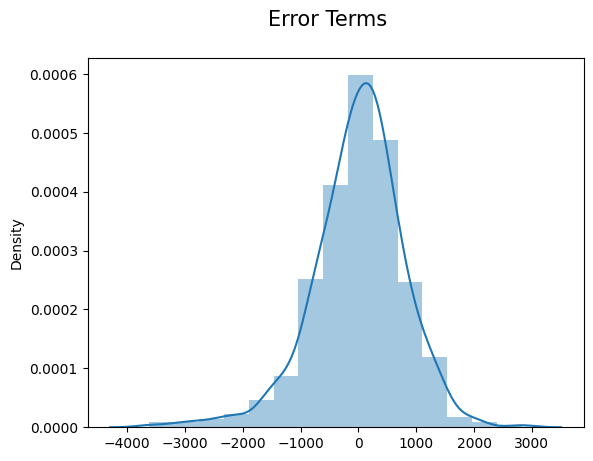

In [62]:
fig = plt.figure()
sns.distplot(y_train - y_train_pred, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)  

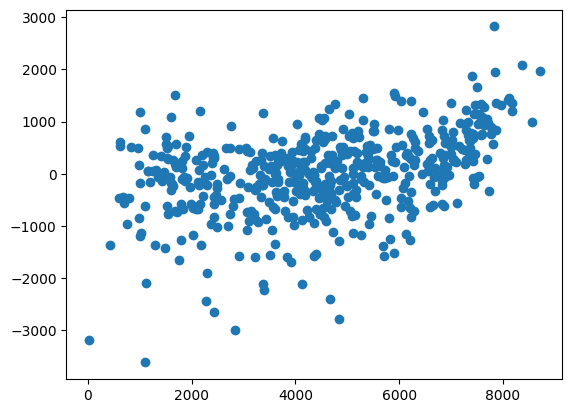

In [64]:
plt.scatter(y_train,y_train - y_train_pred)
plt.show()

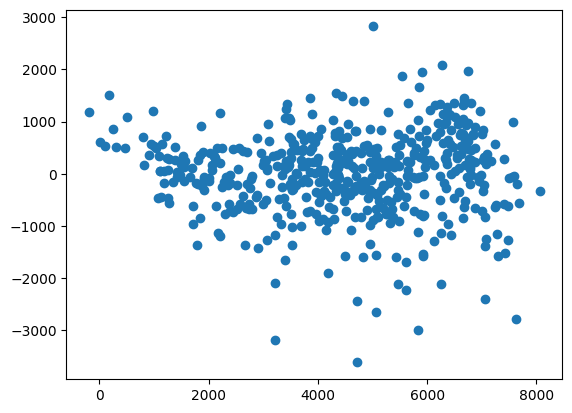

In [78]:
plt.scatter(y_train_pred,y_train - y_train_pred)
plt.show()

## Making Predictions Using Test Data

In [65]:
y_test_pred = lr_model.predict(X_test_sm)

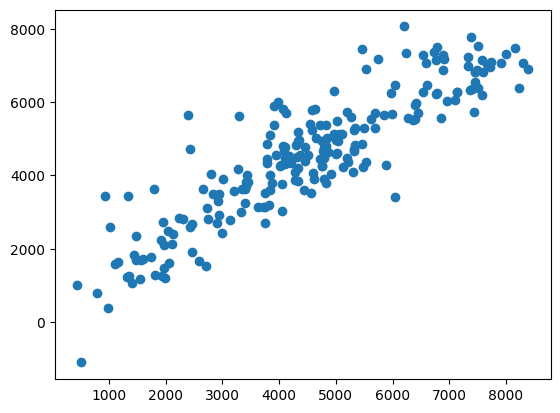

In [66]:
plt.scatter(y_test,y_test_pred)
plt.show()

### R - Square

In [69]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train:",round(r2_train,3),"Test:",round(r2_test,3))

Train: 0.836 Test: 0.796
